In [1]:
import numpy as np       # linear algebra
import pandas as pd      # data processing (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from math import floor,ceil,sqrt
import datetime as dt
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CIPLA.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [4]:
df.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.drop(columns=['Trades', 'Deliverable Volume','%Deliverble'], inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12


In [6]:
df.drop(columns=['Symbol','Series','Turnover'],axis=1,inplace=True)
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2000-01-03,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060
1,2000-01-04,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215
2,2000-01-05,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799
3,2000-01-06,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083
4,2000-01-07,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536


Text(0.5, 1.0, 'Stock Price of CIPLA over the Years')

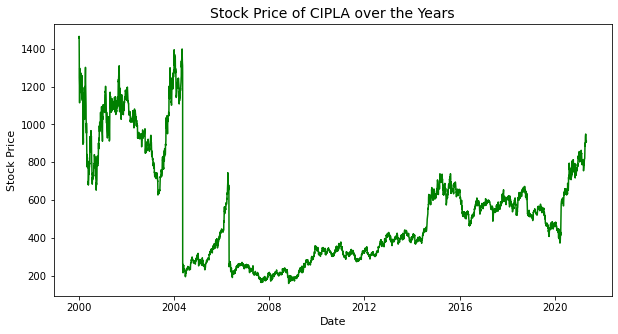

In [7]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=11)
plt.ylabel('Stock Price',size=11)
plt.title('Stock Price of CIPLA over the Years',size=14)

--------STOCK PRICE PREDICTION BY LINEAR REGRESSION--------
Shape of Training Set (3980, 1)
Shape of Validation Set (1326, 1)
RMSE value on validation set: 489.67171972871245


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9684\2156681852.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] =

Accuracy is: Close    14.780418
dtype: float64


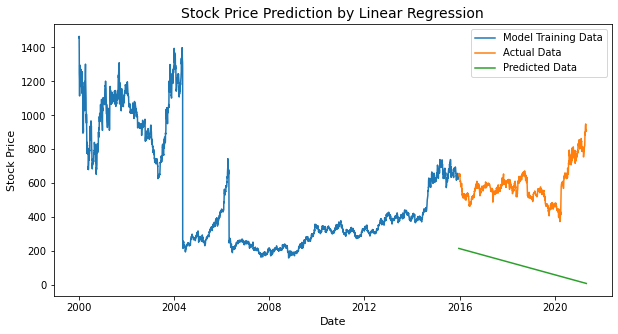

In [8]:
from sklearn.linear_model import LinearRegression
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('--------STOCK PRICE PREDICTION BY LINEAR REGRESSION--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Linear Regression',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

-----STOCK PRICE PREDICTION BY RandomForestRegressor-------
Shape of Training Set (3980, 1)
Shape of Validation Set (1326, 1)
RMSE value on validation set: 114.6481609607404
Accuracy is: Close    80.047309
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9684\100650017.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = 

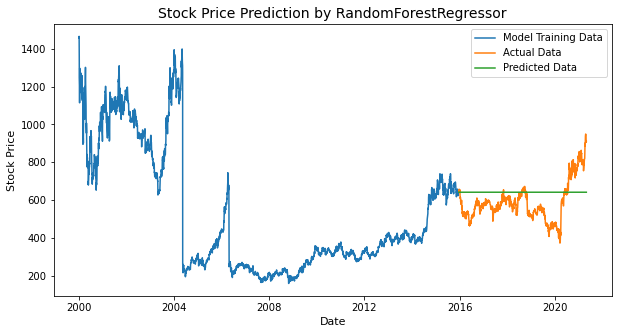

In [9]:
from sklearn.ensemble import RandomForestRegressor
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----STOCK PRICE PREDICTION BY RandomForestRegressor-------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(np.array(x_train).reshape(-1, 1),(y_train.values.ravel()))
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by RandomForestRegressor',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS--------
Shape of Training Set (3980, 1)
Shape of Validation Set (1326, 1)
RMSE value on validation set: 342.0061475347856
Accuracy is: Close    40.479264
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9684\785950157.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = 

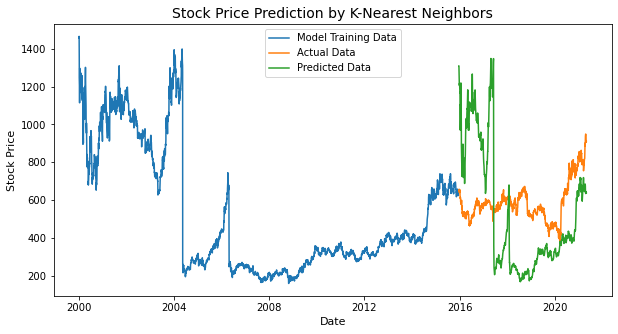

In [10]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

k_nearest_neighbours_predict(df)

--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--
Shape of Training Set (3980, 1)
Shape of Validation Set (1326, 1)
3940/3940 - 38s - loss: 0.0018 - 38s/epoch - 10ms/step
42/42 [==============================] - 1s 6ms/step
RMSE value on validation set: Close    13.758514
dtype: float64
Accuracy percentage: Close    97.454112
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_27288\4267124087.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


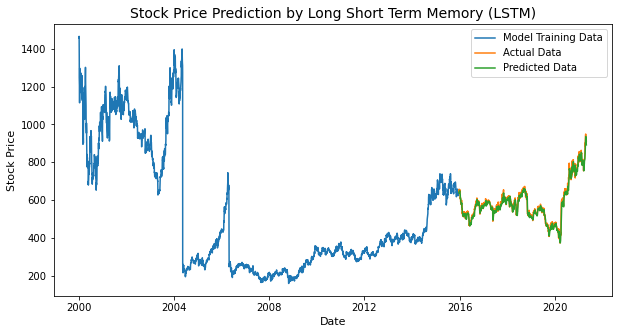

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--')
    print('===========================================================')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    accuracy_percentage = (1 - rms/np.mean(df['Close'])) * 100
    print('Accuracy percentage:', accuracy_percentage)

    print('===========================================================')
    valid['Predictions'] = closing_price
    plt.figure(figsize=(10,5))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



lstm_prediction(df)